In [1]:
%matplotlib inline

from pymongo import MongoClient
import urllib.parse

import os
import sys
import json
from json import dumps

dbServer = os.getenv("MONGO_DB_SERVER", "localhost:27017")
dbUser = os.getenv("MONGO_USERNAME", "root")
dbPW = os.getenv("MONGO_PASSWORD", "rootpassword")

client = MongoClient(dbServer, username=dbUser, password=dbPW)

print("Mongo DB Connection -----")
print("server:" + dbServer)
print("user:" + dbUser)

collection = client.images.images

Mongo DB Connection -----
server:localhost:27017
user:root


In [ ]:
def imagelistpage(page_id: int):
    pagesize = 50
    skipoffset = (page_id - 1) * pagesize
    data = []
    for image in (
        collection.find(
            {},
            {
                "datasetprovider": 1,
                "filenameHash": 1,
                "datasetname": 1,
                "imageFilename": 1,
                "timestamp": 1,
                "velocity_lon": 1,
                "yolov5": 1,
                "_id": 0,
            },
        )
        .skip(skipoffset)
        .limit(pagesize)
    ):
        data.append(image)

    returnString = data
    return returnString

In [ ]:
def find_velocity(min_velocity):
    data = []
    for image in (
        collection.find(
            {"velocity_lon": {"$gt": min_velocity}},
            {
                "datasetprovider": 1,
                "filenameHash": 1,
                "imageFilename": 1,
                "timestamp": 1,
                "velocity_lon": 1,
                "_id": 0,
            },
        )
    ):
        data.append(image)

    returnString = data
    return returnString

find_velocity(12.0)

In [3]:
def find_yolo(class_label):
    data = []
    for image in (
        collection.find(
            {"yolov5": {"$elemMatch": { "name": class_label}}},
            {
                "datasetname" : 1,
                "filenameHash" : 1,
                "yolov5": 1,
                "_id": 0,
            },
        )
    ):
        data.append(image)

    returnString = json.dumps(data)
    returnString = data
    # print(returnString);
    return returnString

find_yolo('skateboard')

[{'yolov5': [{'xmin': 0.0651023611,
    'ymin': 178.510925293,
    'xmax': 81.6526947021,
    'ymax': 353.4594421387,
    'confidence': 0.8975694776,
    'class': 0,
    'name': 'person'},
   {'xmin': 1016.3673706055,
    'ymin': 177.0068969727,
    'xmax': 1223.5841064453,
    'ymax': 359.0989074707,
    'confidence': 0.8924584389,
    'class': 2,
    'name': 'car'},
   {'xmin': 655.5133056641,
    'ymin': 159.4781799316,
    'xmax': 681.744140625,
    'ymax': 241.6158905029,
    'confidence': 0.7210207582,
    'class': 0,
    'name': 'person'},
   {'xmin': 702.4283447266,
    'ymin': 158.8200836182,
    'xmax': 730.6013793945,
    'ymax': 228.6539611816,
    'confidence': 0.4369848669,
    'class': 0,
    'name': 'person'},
   {'xmin': 532.1630859375,
    'ymin': 157.2346496582,
    'xmax': 553.1131591797,
    'ymax': 211.1421051025,
    'confidence': 0.3884727955,
    'class': 0,
    'name': 'person'},
   {'xmin': 0.5812119246,
    'ymin': 319.0174865723,
    'xmax': 83.1289672852,


In [ ]:
def distinct_datasetsnames():
    data = []
    result=collection.distinct("datasetname"),
    data.append(result)

    returnString = json.dumps(data)
    returnString = data
    # print(returnString);
    return returnString

distinct_datasetsnames()

In [ ]:
def distinct_yolo_classes():
    data = []
    result=collection.distinct("yolov5.name"),
    data.append(result)

    returnString = json.dumps(data)
    returnString = data
    # print(returnString);
    return returnString

distinct_yolo_classes()

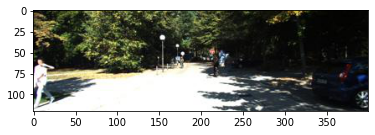

In [2]:
import matplotlib.pyplot as plt

def show_image(filenameHash):
    url = 'http://localhost:8000/imagethumbnail/'+filenameHash
    #IPython.display.Image(url, width = 250)
    
    f = urllib.request.urlopen(url)
    a=plt.imread(f, format='JPG')
    plt.imshow(a)
    
show_image('73b71cfcd213b9f75055dd9e7d327803')
